In [1]:
import tensorflow as tf

In [3]:
import glob         # glob e imageio pra gerar gif com as minhas épocas da rede treinada ao final
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL          #pra manipular imagens
from tensorflow.keras import layers
import time

from IPython import display

In [15]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

(60000, 28, 28)

In [16]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype("float32")
train_images = (train_images - 127.5) / 127.5           #Normalizando as imagens para irem de -1 a 1.

In [17]:
# Definindo algumas constantes padrão do tamanho do meu conjunto (60k imagens)
BUFFER_SIZE = 60000
BATCH_SIZE = 256        # A quantidade de bits que ele varia

In [18]:
# É utilizado o tensor_slices pra fazer uma transformação no meu dataset, usando o shuffle
# pra trazer o tamanho do meu conjunto e o batch pra normalizar esses 256 pixels.
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [19]:
 def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)          #None é o tamanho do Batch

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1,1), padding="same", use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2,2), padding="same", use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2,2), padding="same", use_bias=False, activation="tanh"))
    assert model.output_shape == (None, 28, 28, 1)

    return model

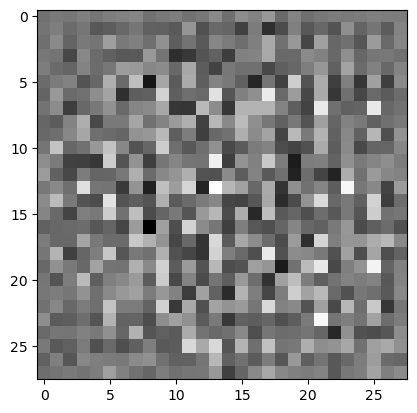

In [20]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap="gray")

# essa é a visão de uma imagem nunca treinada, gerada a partir de um não-treinamento. 
# É a rede neural do jeito que veio ao mundo.